https://www.kaggle.com/blastchar/telco-customer-churn

Esse conjunto de dados mostra quais clientes estão cancelando o serviço de telecom e as características desses clientes.

Faremos seleção de variáveis e diminuiremos a quantidade de colunas. De 19 variáveis explicativas usaremos 4. Essa abordagem é interessante pois podemos diminuir a complexidade na manipulação dos dados mantendo uma boa explicabilidade. Além ajuda a reduzir overfitting.

Colegas no Kaggle usando todas as variáveis conseguiram acurácia em torno de 0.80, meu modelo chegou em 0,76 para os dados de teste.

Os algoritimos de Machine Learning usados foram: 

* Regressão Logística
* Random Forest
* Gradient Boost Classifier

Todos com ajuste de hiperparâmetro

A métrica que busquei foi o Recall. Para o caso de churn queremos saber para quais clientes devemos gastar mais para reter e quais não devemos gastar.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [57]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.drop(columns=['customerID'], inplace=True)

In [6]:
df.shape

(7043, 20)

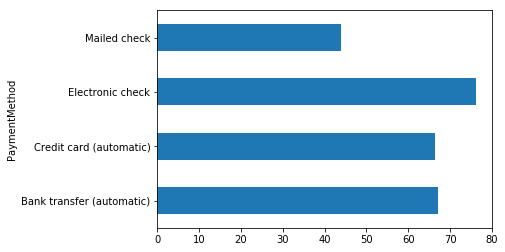

In [65]:
df.groupby('PaymentMethod').MonthlyCharges.mean().plot(kind='barh')

Em média, quem usa Electronic check paga mais por mês

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


In [8]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df = pd.get_dummies(df, columns=['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'], drop_first=True)

In [10]:
df.shape

(7043, 31)

In [11]:
df[df.TotalCharges == " "]

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
488,0,0,52.55,,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0
753,0,0,20.25,,1,0,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0
936,0,0,80.85,,0,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
1082,0,0,25.75,,1,1,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0
1340,0,0,56.05,,0,1,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0
3331,0,0,19.85,,1,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0
3826,0,0,25.35,,1,1,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0
4380,0,0,20.00,,0,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0
5218,0,0,19.70,,1,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0
6670,0,0,73.35,,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0


In [12]:
import re

df.TotalCharges = df.TotalCharges.map(lambda x: re.sub(" ", '0', x))
df.TotalCharges = pd.to_numeric(df.TotalCharges).astype('float')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
SeniorCitizen                            7043 non-null int64
tenure                                   7043 non-null int64
MonthlyCharges                           7043 non-null float64
TotalCharges                             7043 non-null float64
gender_Male                              7043 non-null uint8
Partner_Yes                              7043 non-null uint8
Dependents_Yes                           7043 non-null uint8
PhoneService_Yes                         7043 non-null uint8
MultipleLines_No phone service           7043 non-null uint8
MultipleLines_Yes                        7043 non-null uint8
InternetService_Fiber optic              7043 non-null uint8
InternetService_No                       7043 non-null uint8
OnlineSecurity_No internet service       7043 non-null uint8
OnlineSecurity_Yes                       7043 non-null uint8
OnlineBackup_No internet service   

# Seleção de Variávies

In [14]:
X = df.drop(columns=['Churn_Yes'])
y = df.Churn_Yes

### Chi quadrado

In [15]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

In [16]:
x_norm = MinMaxScaler().fit_transform(X)

chi2_selector = SelectKBest(chi2, k=15)
chi2_selector.fit(x_norm, y)

chi2_s = chi2_selector.get_support()

chi2_feature = X.loc[: ,chi2_s].columns.to_list()
print(str(len(chi2_feature)), 'variáveis selecionadas:')
print(str(chi2_feature))

15 variáveis selecionadas:
['SeniorCitizen', 'tenure', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingMovies_No internet service', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Electronic check']


### RFE

In [17]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [54]:
rfe_selector = RFE(estimator=LogisticRegression(), step=2)
rfe_selector.fit(X, y)

rfe_support = rfe_selector.get_support()

rfe_feature = X.loc[: ,rfe_support].columns.to_list()
print(str(len(rfe_feature)), 'variáveis selecionadas:')
print(str(rfe_feature))

15 variáveis selecionadas:
['Dependents_Yes', 'PhoneService_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Electronic check']


### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [20]:
rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=10))
rf_selector.fit(X,y)

rf_support = rf_selector.get_support()

rf_feature = X.loc[: ,rf_support].columns.to_list()
print(str(len(rf_feature)), 'variáveis selecionadas:')
print(str(rf_feature))

4 variáveis selecionadas:
['tenure', 'MonthlyCharges', 'TotalCharges', 'PaymentMethod_Electronic check']


### Variance Threshold

In [21]:
from sklearn.feature_selection import VarianceThreshold

In [22]:
vt_selector = VarianceThreshold(threshold=0.2)
vt_selector.fit_transform(x_norm)

vt_support = vt_selector.get_support()

vt_feature = X.loc[:, vt_support].columns.tolist()
print(str(len(vt_feature)), 'variáveis selecionadas:')
print(str(vt_feature))

13 variáveis selecionadas:
['gender_Male', 'Partner_Yes', 'Dependents_Yes', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'PaperlessBilling_Yes', 'PaymentMethod_Electronic check']


In [23]:
feature_selection_df = pd.DataFrame({'Variáveis': X.columns,
                                 'chi2': chi2_s,
                                 'RFE': rfe_support,
                                 'Random Forest': rf_support,
                                 'Variance Threshold': vt_support})

feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
feature_selection_df = feature_selection_df.sort_values(['Total', 'Variáveis'], ascending=False)
feature_selection_df.head(15)

,Variáveis,chi2,RFE,Random Forest,Variance Threshold,Total
28,PaymentMethod_Electronic check,True,True,True,True,4
19,TechSupport_Yes,True,True,False,True,3
13,OnlineSecurity_Yes,True,True,False,True,3
10,InternetService_Fiber optic,True,True,False,True,3
1,tenure,True,False,True,False,2
18,TechSupport_No internet service,True,True,False,False,2
20,StreamingTV_No internet service,True,True,False,False,2
26,PaperlessBilling_Yes,False,True,False,True,2
12,OnlineSecurity_No internet service,True,True,False,False,2
15,OnlineBackup_Yes,False,True,False,True,2


In [24]:
my_features = feature_selection_df[(feature_selection_df.Total == 4) | (feature_selection_df.Total == 3)]['Variáveis'].to_list()
len(my_features)

4

In [25]:
print(my_features)

['PaymentMethod_Electronic check', 'TechSupport_Yes', 'OnlineSecurity_Yes', 'InternetService_Fiber optic']


In [26]:
expl = df[['PaymentMethod_Electronic check', 'InternetService_Fiber optic', 'TechSupport_Yes', 'OnlineSecurity_Yes']]

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(expl, y, random_state=34)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5282, 4), (1761, 4), (5282,), (1761,))

# Análise

In [30]:
from sklearn.model_selection import GridSearchCV

### Regressão Logística

In [31]:
rl_model = LogisticRegression()

In [32]:
param_grid_rl = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}

In [33]:
grid_rl = GridSearchCV(estimator=rl_model, param_grid=param_grid_rl, scoring='recall', cv=5)

grid_rl.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [34]:
grid_rl.best_params_

{'C': 0.009, 'penalty': 'l2'}

### Random Forest

In [35]:
rf_model = RandomForestClassifier()

In [36]:
param_grid_rf = {'n_estimators': [10, 20, 50, 100, 200, 500],
             'criterion': ['gini', 'entropy'],
             'bootstrap': [True, False]}

In [37]:
grid_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, scoring='recall', cv=5)

grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 20, 50, 100, 200, 500], 'criterion': ['gini', 'entropy'], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [38]:
grid_rf.best_params_

{'bootstrap': True, 'criterion': 'gini', 'n_estimators': 10}

### Gradient Boosting Classifier

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
gbc_model = GradientBoostingClassifier()

In [41]:
param_gbc = {
    'min_samples_split': [0.1, 0.5, 1.0, 3, 5],
    'min_samples_leaf': [0.1, 0.5],
    'max_depth': [2,3,5,10],
    'n_estimators':[2,5,10,15]}

In [42]:
grid_gbc = GridSearchCV(estimator=gbc_model, param_grid=param_gbc, scoring='recall', cv=5)

grid_gbc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': [0.1, 0.5, 1.0, 3, 5], 'min_samples_leaf': [0.1, 0.5], 'max_depth': [2, 3, 5, 10], 'n_estimators': [2, 5, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [43]:
grid_gbc.best_params_

{'max_depth': 3,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1,
 'n_estimators': 15}

### SVC

In [67]:
from sklearn.svm import SVC

In [68]:
svc_model = SVC()

In [70]:
param_grid_svc = {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}

In [71]:
grid_svc = GridSearchCV(estimator=svc_model, param_grid=param_grid_svc, scoring='recall', cv=5)

grid_svc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [72]:
grid_svc.best_params_

{'C': 1, 'gamma': 0.1}

# Resutados

In [44]:
# Regressão Logística
y_pred_rl_test = grid_rl.predict(X_test)
y_pred_rl_train = grid_rl.predict(X_train)

In [45]:
# Random Forest
y_pred_rf_test = grid_rf.predict(X_test)
y_pred_rf_train = grid_rf.predict(X_train)

In [46]:
# Gradient Boost
y_pred_gb_test = grid_gbc.predict(X_test)
y_pred_gb_train = grid_gbc.predict(X_train)

In [73]:
# SVC
y_pred_svc_test = grid_svc.predict(X_test)
y_pred_svc_train = grid_svc.predict(X_train)

In [47]:
from sklearn.metrics import confusion_matrix, classification_report

In [48]:
# Regressão Logística
print(classification_report(y_pred_rl_test, y_test))
print(confusion_matrix(y_pred_rl_test, y_test))

              precision    recall  f1-score   support

           0       0.91      0.79      0.85      1486
           1       0.34      0.59      0.43       275

   micro avg       0.76      0.76      0.76      1761
   macro avg       0.63      0.69      0.64      1761
weighted avg       0.82      0.76      0.78      1761

[[1173  313]
 [ 112  163]]


In [49]:
# Random Forest
print(classification_report(y_pred_rf_test, y_test))
print(confusion_matrix(y_pred_rf_test, y_test))

              precision    recall  f1-score   support

           0       0.91      0.79      0.85      1486
           1       0.34      0.59      0.43       275

   micro avg       0.76      0.76      0.76      1761
   macro avg       0.63      0.69      0.64      1761
weighted avg       0.82      0.76      0.78      1761

[[1173  313]
 [ 112  163]]


In [50]:
# Gradient Boost
print(classification_report(y_pred_gb_test, y_test))
print(confusion_matrix(y_pred_gb_test, y_test))

              precision    recall  f1-score   support

           0       0.91      0.79      0.85      1486
           1       0.34      0.59      0.43       275

   micro avg       0.76      0.76      0.76      1761
   macro avg       0.63      0.69      0.64      1761
weighted avg       0.82      0.76      0.78      1761

[[1173  313]
 [ 112  163]]


In [74]:
# SVC
print(classification_report(y_pred_svc_test, y_test))
print(confusion_matrix(y_pred_svc_test, y_test))

              precision    recall  f1-score   support

           0       0.91      0.79      0.85      1486
           1       0.34      0.59      0.43       275

   micro avg       0.76      0.76      0.76      1761
   macro avg       0.63      0.69      0.64      1761
weighted avg       0.82      0.76      0.78      1761

[[1173  313]
 [ 112  163]]


In [51]:
from sklearn.metrics import accuracy_score

In [56]:
print(round(accuracy_score(y_pred_rl_test, y_test), 2))

0.76


# Conclusão

Com 4 variáveis diminuimos a variação das respostas. Qualquer um dos modelos pode ser usado no Deploy. Como a Regressão Logística e a forma mais simples entre os algoritimos utilizados, ela deve ser a implementada.